In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import  LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('dataset/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
X = df.drop(columns='math score', axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [4]:
y = df['math score']

In [5]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [6]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns
print(num_features)
print(cat_features)

Index(['reading score', 'writing score'], dtype='object')
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer (
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", num_transformer, num_features)
    ]
)
X = preprocessor.fit_transform(X)

In [8]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [9]:
def evaluate_model(true, predicted):
  mae = mean_absolute_error(true, predicted)
  mse = mean_squared_error(true, predicted)
  rmse = np.sqrt(mse)
  r2_square = r2_score(true,predicted)
  return mae, mse, rmse, r2_square

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape , X_test.shape

((800, 19), (200, 19))

In [14]:

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoosting Regressor": AdaBoostRegressor(),
}

model_list = []
r2_list = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the results
    model_train_mae = mean_absolute_error(y_train, y_train_pred)
    model_train_mse = mean_squared_error(y_train, y_train_pred)
    model_train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    model_train_r2_score = r2_score(y_train, y_train_pred)

    model_test_mae = mean_absolute_error(y_test, y_test_pred)
    model_test_mse = mean_squared_error(y_test, y_test_pred)
    model_test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    model_test_r2_score = r2_score(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print("Model performance for the training set")
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- R^2 Score: {:.4f}".format(model_train_r2_score))

    print("\nModel performance for the test set")
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- R^2 Score: {:.4f}".format(model_test_r2_score))

    r2_list.append(model_test_r2_score)

    print('=' * 35)
    print('\n')
    

Linear Regression
Model performance for the training set
- Mean Squared Error: 28.3457
- Mean Absolute Error: 4.2683
- Root Mean Squared Error: 5.3241
- R^2 Score: 0.8743

Model performance for the test set
- Mean Squared Error: 28.8318
- Mean Absolute Error: 4.1996
- Root Mean Squared Error: 5.3695
- R^2 Score: 0.8815


Lasso
Model performance for the training set
- Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- Root Mean Squared Error: 6.5938
- R^2 Score: 0.8071

Model performance for the test set
- Mean Squared Error: 42.5064
- Mean Absolute Error: 5.1579
- Root Mean Squared Error: 6.5197
- R^2 Score: 0.8253


Ridge
Model performance for the training set
- Mean Squared Error: 28.3378
- Mean Absolute Error: 4.2650
- Root Mean Squared Error: 5.3233
- R^2 Score: 0.8743

Model performance for the test set
- Mean Squared Error: 29.0563
- Mean Absolute Error: 4.2111
- Root Mean Squared Error: 5.3904
- R^2 Score: 0.8806


K-neighbors Regressor
Model performance for the trainin

/home/daddyjoe/anaconda3/envs/myenv/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBRegressor
Model performance for the training set
- Mean Squared Error: 0.8258
- Mean Absolute Error: 0.6148
- Root Mean Squared Error: 0.9087
- R^2 Score: 0.9963

Model performance for the test set
- Mean Squared Error: 43.4141
- Mean Absolute Error: 5.0844
- Root Mean Squared Error: 6.5889
- R^2 Score: 0.8216


AdaBoosting Regressor
Model performance for the training set
- Mean Squared Error: 34.7626
- Mean Absolute Error: 4.8560
- Root Mean Squared Error: 5.8960
- R^2 Score: 0.8458

Model performance for the test set
- Mean Squared Error: 36.8557
- Mean Absolute Error: 4.7155
- Root Mean Squared Error: 6.0709
- R^2 Score: 0.8485




In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', "R2_score"]).sort_values(["R2_score"], ascending=False)

,Model Name,R2_score
0,Linear Regression,0.881516
2,Ridge,0.880593
5,Random Forest Regressor,0.851202
7,AdaBoosting Regressor,0.848542
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-neighbors Regressor,0.783811
4,Decision Tree,0.752300


Text(0, 0.5, 'Predicted')

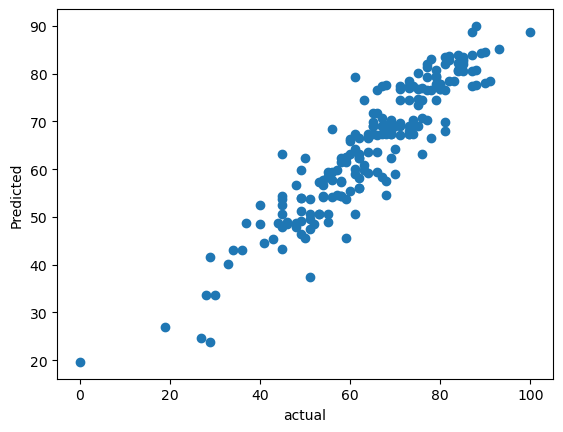

In [16]:
plt.scatter(y_test,y_test_pred)
plt.xlabel("actual")
plt.ylabel('Predicted')